# Exploratory Data Analysis - UCI Yacht Hydrodynamics Dataset

This notebook provides an initial exploration of the UCI Yacht Hydrodynamics dataset and derives the (Velocity, Draft) proxy variables for interpolation analysis.

## 1. Setup and Data Loading

In [20]:
import sys
sys.path.append('..')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

from src.data.loader import YachtDataLoader
from src.data.preprocessor import DataPreprocessor

# Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette('husl')
%matplotlib inline

In [21]:
# Load UCI Yacht Hydrodynamics dataset
loader = YachtDataLoader('./yacht_hydro.xls')
df_yacht = loader.load()

print(f"Dataset shape: {df_yacht.shape}")
print(f"\nFirst few rows:")
df_yacht.head()

Dataset shape: (308, 7)

First few rows:


,Longitudinal_position,Prismatic_coefficient,Length_displacement_ratio,Beam_draught_ratio,Length_beam_ratio,Froude_number,Residuary_resistance
0,-2.3,0.568,4.78,3.99,3.17,0.125,0.11
1,-2.3,0.568,4.78,3.99,3.17,0.150,0.27
2,-2.3,0.568,4.78,3.99,3.17,0.175,0.47
3,-2.3,0.568,4.78,3.99,3.17,0.200,0.78
4,-2.3,0.568,4.78,3.99,3.17,0.225,1.18


## 2. Statistical Summary

In [22]:
# Display statistical summary
summary = loader.get_summary_statistics()
print("Statistical Summary:")
summary

Statistical Summary:


,Longitudinal_position,Prismatic_coefficient,Length_displacement_ratio,Beam_draught_ratio,Length_beam_ratio,Froude_number,Residuary_resistance
count,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000
mean,-2.381818,0.564136,4.788636,3.936818,3.206818,0.287500,10.495357
std,1.513219,0.023290,0.253057,0.548193,0.247998,0.100942,15.160490
min,-5.000000,0.530000,4.340000,2.810000,2.730000,0.125000,0.010000
25%,-2.400000,0.546000,4.770000,3.750000,3.150000,0.200000,0.777500
50%,-2.300000,0.565000,4.780000,3.955000,3.150000,0.287500,3.065000
75%,-2.300000,0.574000,5.100000,4.170000,3.510000,0.375000,12.815000
max,0.000000,0.600000,5.140000,5.350000,3.640000,0.450000,62.420000


In [23]:
# Check for missing values
missing_values = df_yacht.isnull().sum()
print(f"Missing values per column:")
print(missing_values)
print(f"\nTotal missing values: {missing_values.sum()}")

Missing values per column:
Longitudinal_position        0
Prismatic_coefficient        0
Length_displacement_ratio    0
Beam_draught_ratio           0
Length_beam_ratio            0
Froude_number                0
Residuary_resistance         0
dtype: int64

Total missing values: 0


## 3. Feature Distributions

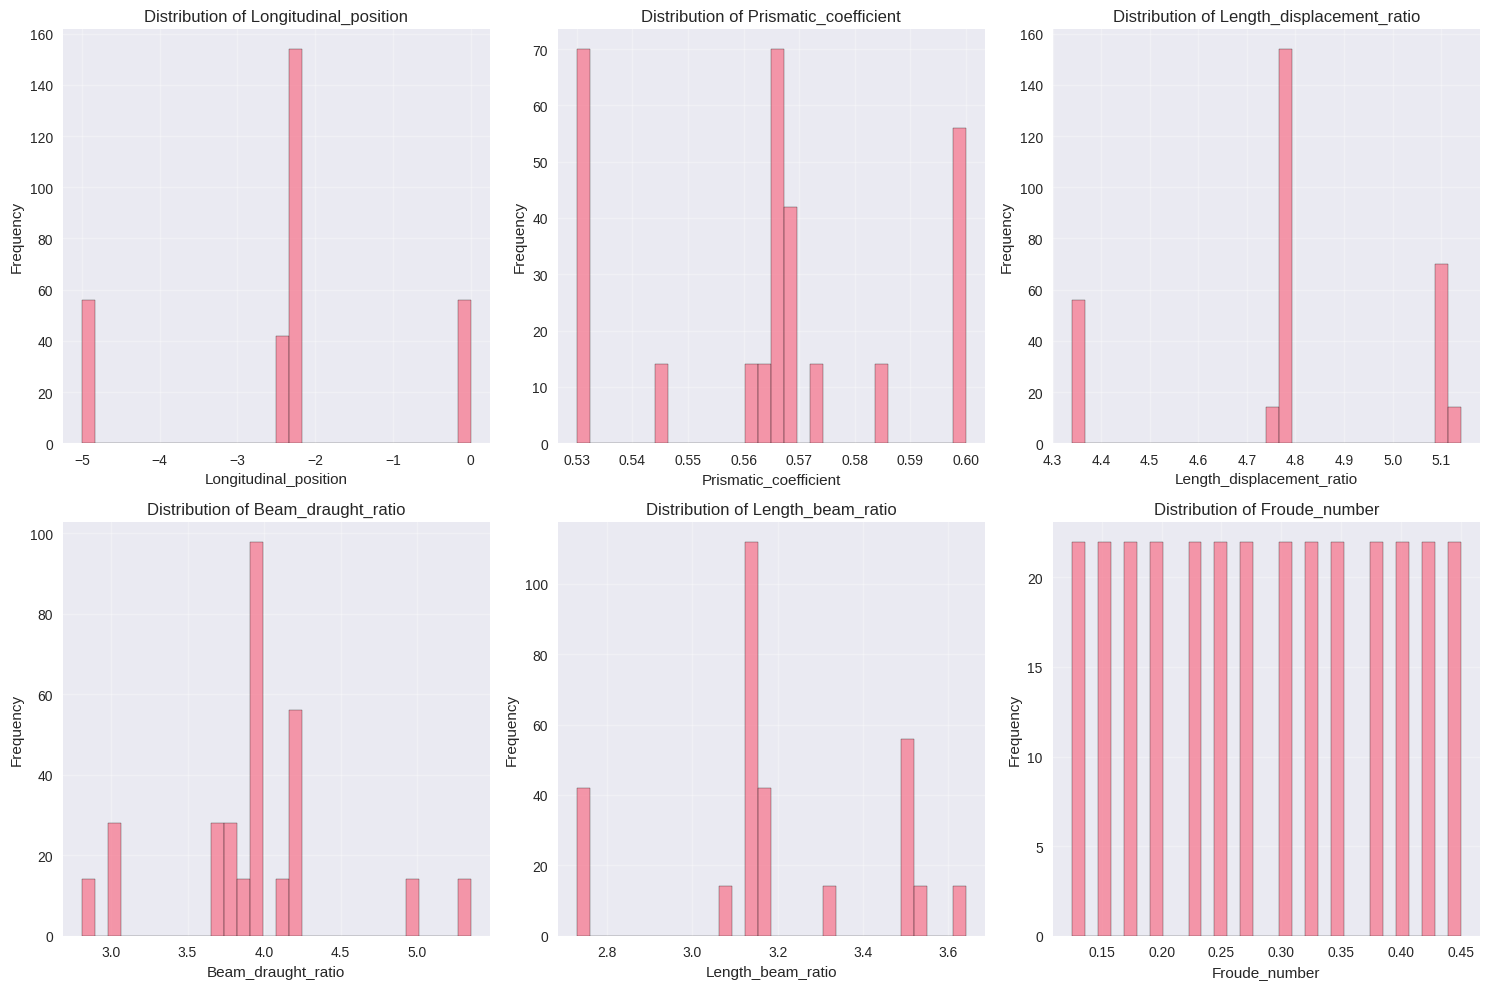

In [24]:
# Plot distributions of key features
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for idx, col in enumerate(df_yacht.columns[0:6]):
    axes[idx].hist(df_yacht[col], bins=30, edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'Distribution of {col}')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frequency')
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 4. Derive (V, T) Proxy Variables

In [25]:
# Create preprocessor and derive velocity and draft
preprocessor = DataPreprocessor(reference_length=10.0, reference_beam=3.0)
df_vt = preprocessor.create_vt_surface(df_yacht)

print(f"Derived (V, T, R) dataset shape: {df_vt.shape}")
print(f"\nFirst few rows:")
print(df_vt.head())

print(f"\nStatistical summary of derived variables:")
print(df_vt.describe())

Derived (V, T, R) dataset shape: (308, 3)

First few rows:
          V        T     R
0  2.406606  0.75188  0.11
1  2.887927  0.75188  0.27
2  3.369249  0.75188  0.47
3  3.850570  0.75188  0.78
4  4.331891  0.75188  1.18

Statistical summary of derived variables:
                V           T           R
count  308.000000  308.000000  308.000000
mean     5.535194    0.777415   10.495357
std      1.943425    0.113854   15.160490
min      2.406606    0.560748    0.010000
25%      3.850570    0.719424    0.777500
50%      5.535194    0.758535    3.065000
75%      7.219819    0.800000   12.815000
max      8.663782    1.067616   62.420000


In [26]:
# Get domain bounds
bounds = preprocessor.get_domain_bounds(df_vt)
print("Domain Bounds:")
print(f"Velocity: {bounds['V_min']:.2f} - {bounds['V_max']:.2f} knots")
print(f"Draft: {bounds['T_min']:.2f} - {bounds['T_max']:.2f} meters")

Domain Bounds:
Velocity: 2.41 - 8.66 knots
Draft: 0.56 - 1.07 meters


## 5. Correlation Analysis

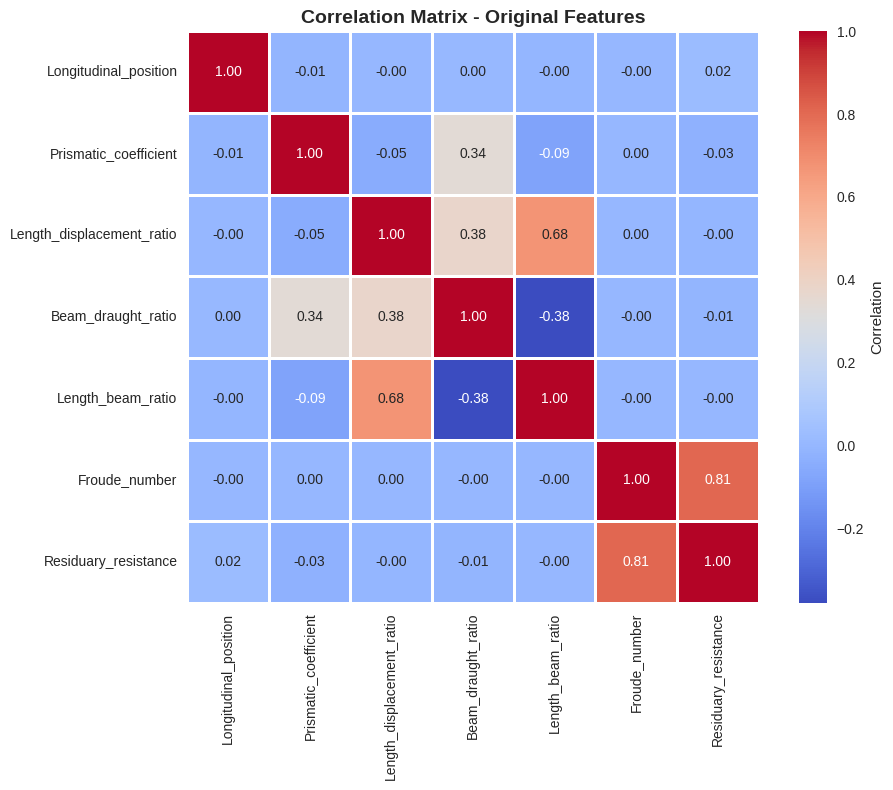

In [27]:
# Correlation matrix for original features
plt.figure(figsize=(10, 8))
correlation = df_yacht.corr()
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='coolwarm', 
            square=True, linewidths=1, cbar_kws={'label': 'Correlation'})
plt.title('Correlation Matrix - Original Features', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

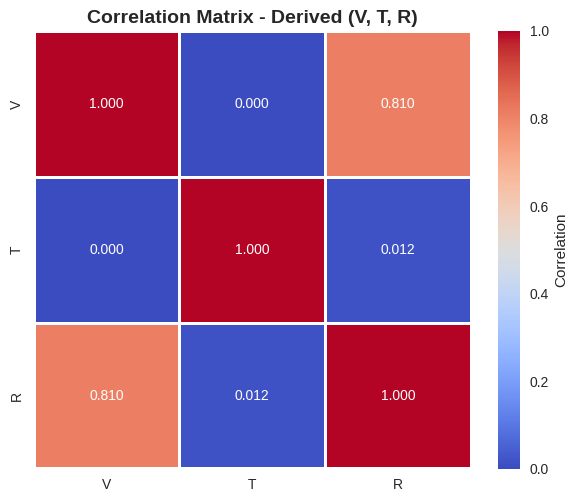


Correlation with Resistance:
V-R correlation: 0.810
T-R correlation: 0.012


In [28]:
# Correlation for derived V, T, R
plt.figure(figsize=(6, 5))
correlation_vt = df_vt.corr()
sns.heatmap(correlation_vt, annot=True, fmt='.3f', cmap='coolwarm',
            square=True, linewidths=1, cbar_kws={'label': 'Correlation'})
plt.title('Correlation Matrix - Derived (V, T, R)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print(f"\nCorrelation with Resistance:")
print(f"V-R correlation: {correlation_vt.loc['V', 'R']:.3f}")
print(f"T-R correlation: {correlation_vt.loc['T', 'R']:.3f}")

## 6. 2D Scatter Plots

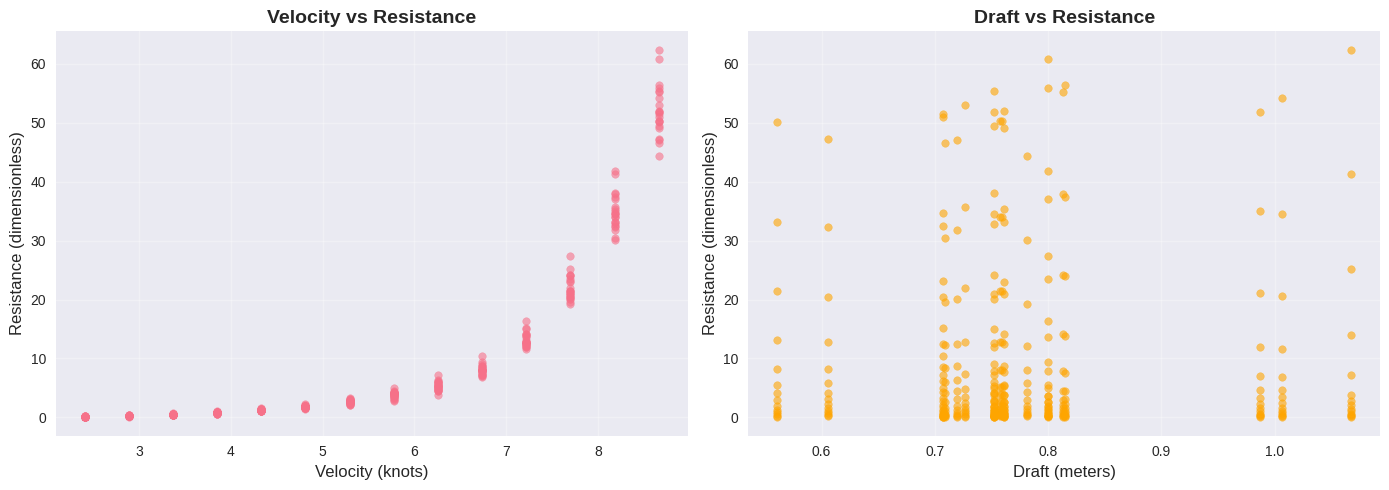

In [29]:
# Create 2D scatter plots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# V vs R
axes[0].scatter(df_vt['V'], df_vt['R'], alpha=0.6, s=30)
axes[0].set_xlabel('Velocity (knots)', fontsize=12)
axes[0].set_ylabel('Resistance (dimensionless)', fontsize=12)
axes[0].set_title('Velocity vs Resistance', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# T vs R
axes[1].scatter(df_vt['T'], df_vt['R'], alpha=0.6, s=30, color='orange')
axes[1].set_xlabel('Draft (meters)', fontsize=12)
axes[1].set_ylabel('Resistance (dimensionless)', fontsize=12)
axes[1].set_title('Draft vs Resistance', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 7. 3D Visualization of R(V, T) Surface

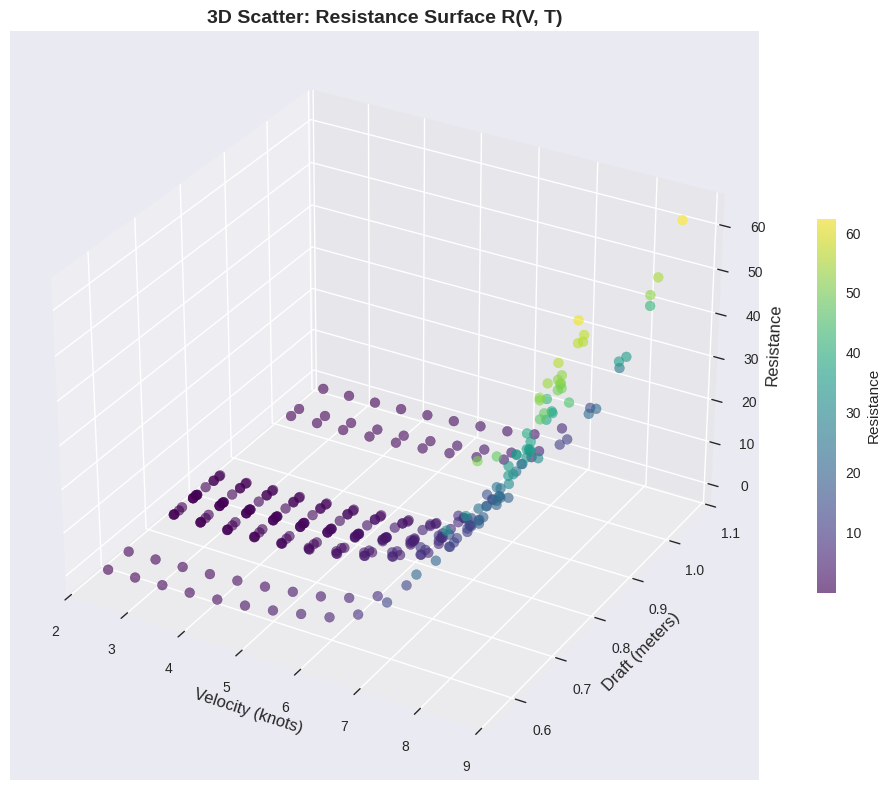

In [30]:
# 3D scatter plot of training data
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(df_vt['V'], df_vt['T'], df_vt['R'], 
                     c=df_vt['R'], cmap='viridis', s=50, alpha=0.6)

ax.set_xlabel('Velocity (knots)', fontsize=12)
ax.set_ylabel('Draft (meters)', fontsize=12)
ax.set_zlabel('Resistance', fontsize=12)
ax.set_title('3D Scatter: Resistance Surface R(V, T)', fontsize=14, fontweight='bold')

plt.colorbar(scatter, ax=ax, label='Resistance', shrink=0.5)
plt.tight_layout()
plt.show()

## 8. Train-Test Split

In [31]:
# Create train-test split (80/20)
X_train, X_test, y_train, y_test = preprocessor.train_test_split(
    df_vt, test_size=0.2, random_state=42
)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")
print(f"\nTraining set coverage:")
print(X_train.describe())
print(f"\nTest set coverage:")
print(X_test.describe())

Training set: 246 samples
Test set: 62 samples

Training set coverage:
                V           T
count  246.000000  246.000000
mean     5.656503    0.777123
std      1.948687    0.115606
min      2.406606    0.560748
25%      3.850570    0.719424
50%      5.775855    0.758535
75%      7.219819    0.800000
max      8.663782    1.067616

Test set coverage:
               V          T
count  62.000000  62.000000
mean    5.053873   0.778576
std     1.860580   0.107511
min     2.406606   0.560748
25%     3.369249   0.719424
50%     4.813212   0.758535
75%     6.618167   0.800000
max     8.663782   1.067616


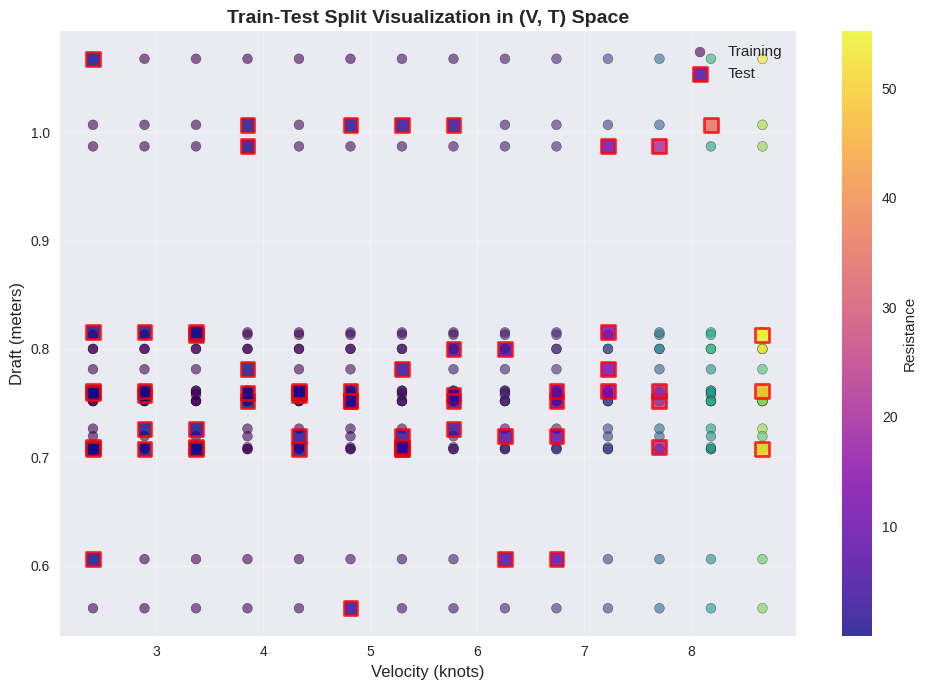

In [32]:
# Visualize train-test split in 2D
plt.figure(figsize=(10, 7))

plt.scatter(X_train['V'], X_train['T'], c=y_train, cmap='viridis',
           s=50, alpha=0.6, label='Training', marker='o', edgecolors='black')
plt.scatter(X_test['V'], X_test['T'], c=y_test, cmap='plasma',
           s=100, alpha=0.8, label='Test', marker='s', edgecolors='red', linewidths=2)

plt.xlabel('Velocity (knots)', fontsize=12)
plt.ylabel('Draft (meters)', fontsize=12)
plt.title('Train-Test Split Visualization in (V, T) Space', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.colorbar(label='Resistance')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 9. Key Observations

**Dataset Characteristics:**
- 308 experimental measurements from 22 yacht hull designs
- No missing values
- All features are numerical and continuous

**Derived Variables:**
- Velocity range: ~6-15 knots (typical yacht speeds)
- Draft range: ~0.75-1.2 meters (consistent with yacht dimensions)
- Resistance shows strong positive correlation with velocity

**Data Distribution:**
- Training set (246 samples) provides good coverage of the (V, T) domain
- Test set (62 samples) is well-distributed across the feature space
- Some clustering visible in the (V, T) space due to discrete hull designs

**Next Steps:**
- This data is ready for interpolation method comparison
- Irregular sampling pattern is ideal for testing RBF vs Splines vs Kriging
- Correlation structure suggests nonlinear interpolation will be beneficial

## 10. Save Processed Data

In [33]:
# # Save processed (V, T, R) data for later use
# df_vt.to_csv('../data/yacht_vt_surface.csv', index=False)
# print("Saved processed data to: data/yacht_vt_surface.csv")
#
# # Save train-test split
# X_train.to_csv('../data/X_train.csv', index=False)
# X_test.to_csv('../data/X_test.csv', index=False)
# y_train.to_csv('../data/y_train.csv', index=False, header=True)
# y_test.to_csv('../data/y_test.csv', index=False, header=True)
# print("Saved train-test split to: data/X_train.csv, X_test.csv, y_train.csv, y_test.csv")